In [1]:
import numpy as np
import pandas as pd

In [2]:
# using tensorflow as the sklearn fetch_ml function malfunctioned
from tensorflow.examples.tutorials.mnist import input_dataput_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/")

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [11]:
X, y = mnist.train.images, mnist.train.labels

In [14]:
X.shape, y.shape

((55000, 784), (55000,))

In [15]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

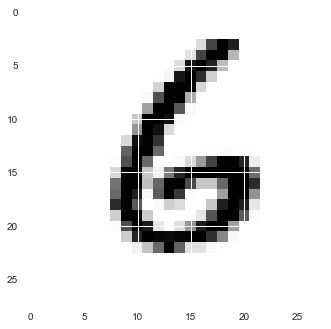

In [16]:
_ = X[1000]
_image = _.reshape(28,28)
plt.imshow(_image)

In [17]:
y[1000]

6

In [52]:
# find first index where image equals certain number
np.where(y==0)[0][0]

7

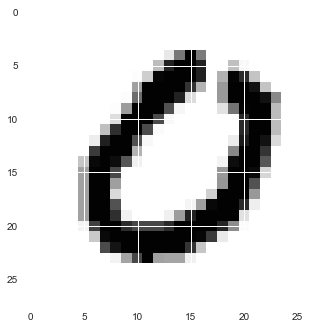

In [54]:
_ = X[7]
_image = _.reshape(28,28)
plt.imshow(_image)

## Splitting the train and test splits

In [42]:
num_split = 47500
X_train, X_test, y_train, y_test = X[:num_split], X[num_split], y[:num_split], y[num_split:]

In [43]:
# randomly permute sequence
shuffle_index = np.random.permutation(num_split)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

# Training a Binary Classifier

In [45]:
y_train_0 = (y_train == 0)

In [46]:
y_train_0

array([False,  True, False, ..., False, False, False], dtype=bool)

In [48]:
y_test_0 = (y_test == 0)

In [49]:
y_test_0

array([False, False, False, ..., False, False, False], dtype=bool)

## SGDClassifier

In [51]:
# Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(random_state = 0)
clf.fit(X_train, y_train_0)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=0, shuffle=True, verbose=0,
       warm_start=False)

In [55]:
clf.predict(X[7].reshape(1, -1))

array([ True], dtype=bool)

## Performance Measures

In [56]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
clf = SGDClassifier(random_state=0)

In [57]:
# split data into 3 portions
skfolds = StratifiedKFold(n_splits=3, random_state=100)

In [58]:
for train_index, test_index in skfolds.split(X_train, y_train_0):
    clone_clf = clone(clf)
    # make sure you are in the correct fold -> use of train_index
    X_train_fold = X_train[train_index]
    y_train_fold = (y_train_0[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_0[test_index])
    
    clone_clf.fit(X_train_fold, y_train_fold)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = (sum(y_pred == y_test_fold))
    print("{0:.4f}".format(n_correct / len(y_pred)))

0.9879
0.9879
0.9876


In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
cross_val_score(clf, X_train, y_train_0, cv=3, scoring='accuracy')

array([ 0.98793735,  0.98793659,  0.98762079])

In [61]:
cross_val_score(clf, X_train, y_train_0, cv=10, scoring='accuracy')

array([ 0.98821301,  0.98800253,  0.9871606 ,  0.98210903,  0.98695012,
        0.98336492,  0.98989261,  0.98673405,  0.98547063,  0.98652348])

## Danger of Blindly Applying Evaluator as a Performance Measure

In [65]:
# proportion of images that are 0
sum(y_train_0) / len(y_train_0)

0.099052631578947364

In [66]:
# about 90% are not 0
1- sum(y_train_0) / len(y_train_0)

0.90094736842105261

You'll be 90% accurate if you simply predict that every case is not a 0 value. Accuracy is not the preferred method for classifiers with imbalanced data.

## Confusion Matrix

In [67]:
from sklearn.model_selection import cross_val_predict

In [68]:
y_train_pred = cross_val_predict(clf, X_train, y_train_0, cv=3)

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
confusion_matrix(y_train_0, y_train_pred)

array([[42627,   168],
       [  410,  4295]])

First row is negative class. The non-zeroes.

Second row is positive class. The actual zeroes.

First column is negative prediction.

Second column is positive prediction.

Precision -> accuracy of positive predictions -> TP / TP + FP

In [74]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [72]:
precision_score(y_train_0, y_train_pred)

0.96235715886175222

Recall -> True Positive Rate -> ratio of positive instances correctly detected by the classifier -> TP / TP + FN 

In [73]:
recall_score(y_train_0, y_train_pred)

0.91285866099893731

Precision and Recall scores indicates that ML algorithm perform better than a 'dumb' classifier that would have a 90% success rate.

f1score is the harmonic mean of precision and recall. Gives more weight to the lower value. Punishes classifiers that have large differences in those scores.

In [75]:
f1_score(y_train_0, y_train_pred)

0.93695462478184999

Trying to reduce precision will increase the recall.

# Receiever Operating Characteristics (ROC) Curve

Plots the True Positive Rate (Recall) against the False Positive Rate (the rate of negative instances incorrectly classified as positive). 

FPR = FP / FP / TN

TNR = TN / TN + FP

In [86]:
from sklearn.metrics import roc_curve, roc_auc_score

In [89]:
fpr, tpr, thresholds = roc_curve(y_train_0, y_train_pred)

In [90]:
roc_auc_score(y_train_0, y_train_pred)

0.95446648437258474

Use Precision Recall curve when you care more about false positives.

Use ROC curve when you care more about false negatives.